# MATH0487-2 : Eléments de statistiques
## Devoir 1 - Exploration, statistiques descriptives et modèles
### L'équipe de MATH0487
#### Université de Liège, Octobre 2022

---

<!-- BEGIN QUESTION -->

**Nom(s), Prénom(s) et matricule(s) :**

$\texttt{Assaoud Ayoub s207227} \\ \texttt{Biada Freddy Greg s}$


<!-- END QUESTION -->

---

## Instructions générales

### Objectifs

Les objectifs de ce devoir sont les suivants : 

- explorer un set de données et en extraire différentes statistiques descriptives,

- manipuler les paramètres d’un modèle statistique et comprendre le concept de vraisemblance (*likelihood*, en anglais).

### Délivrables

Ce devoir doit être réalisé par groupe de 2 étudiants maximum. Chaque groupe doit
rendre ce notebook complété, et rien d'autre. 

La date limite de soumission est fixée au **9 novembre 2022 à 20h00**. Jusqu’à cette date, vous avez la possibilité de (re)soumettre votre rapport ou votre code autant de fois que vous le souhaitez. Au-delà de cette date, il ne sera plus possible de soumettre le devoir. N’attendez pas la dernière minute pour soumettre une première version de votre travail !

La soumission doit se faire sur la plateforme [Gradescope](https://www.gradescope.com/) directement. 

- Chaque étudiant doit s'inscrire sur [Gradescope](https://www.gradescope.com/) en utilisant son adresse `@student.uliege.be`. Si vous ne voyez pas le cours MATH0487 dans votre tableau de bord, contactez-nous sur [Ed](https://edstem.org/us/dashboard) au plus vite (n'attendez pas la veille de la date de soumission pour vérifier que vous avez accès au cours sur Gradescope ;- ).

- Chaque groupe doit soumettre un seul fichier `.ipynb` sur [Gradescope](https://www.gradescope.com/). Toutes les cellules doivent être exécutables et leurs sorties ne doivent pas être effacées avant la soumission. Assurez-vous que tous les membres du groupe sont correctement ajoutés à la soumission !

Si vous n'êtes pas familier avec Gradescope, vous trouverez des explicationns sur chaque étape de la soumission ci-dessous :
- [Soumission de code](https://help.gradescope.com/article/ccbpppziu9-student-submit-work#code_submissions),
- [Ajout de membres de groupe](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

***Remarques importantes*** sur l'utilisation de ce notebook :
- Ne modifiez et ne supprimez pas de cellules (Markdown) contenant des consignes/questions.
- Remplissez uniquement les cellules prévues à cet effet (`...` indique une portion réservée à votre code, et <span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span> indique une portion réservée à une réponse écrite), n'en créez pas de nouvelles; si, pour une raison quelconque, vous veniez à supprimer une cellule prédéfinie, il vous est demandé de télécharger à nouveau le notebook vierge et de copier le contenu déjà développé de votre côté dans cette copie vierge.
- Respectez le type de cellule prévu pour une question donnée: certaines questions demandent d'implémenter du code (cellules "Code", en Python) et de présenter des résultats (valeurs numériques, tables, graphes, ...), et d'autres vous demandent de fournir une réponse utilisant du texte (cellules "Markdown", incluant certaines commandes LaTeX et acceptant la syntaxe HTML).

Si vous rencontrez des problèmes ou avez des questions concernant ces remarques, merci de contacter l'équipe pédagogique *via* le forum de [Ed Discussion](https://edstem.org/us/courses/29547/discussion/1795956).

### Questions

Toutes vos questions sur le devoir doivent être postées dans le forum de [Ed Discussion](https://edstem.org/us/courses/29547/discussion/1795956) du
cours sous la catégorie *Assignments/Homework* (une question par fil de discussion). Vos questions sur
l’utilisation de Jupyter peuvent être postées sous la catégorie *Jupyter*.

### Politique de collaboration

Vous pouvez discuter du devoir avec d’autres groupes, mais *vous devez
écrire vous-même vos propres solutions, et écrire et exécuter vous-même votre propre code*. Copier la
solution de quelqu’un d’autre, ou simplement apporter des modifications triviales pour ne pas copier
textuellement, n’est pas acceptable.

---

## 0. Présentation du problème

Le set de données que vous allez étudier reprend certaines caractéristiques physicochimiques et sensorielles de différentes variantes du vin portugais *Vinho verde*. Protégé par une *Denominação de Origem Controlada*, ce vin est originaire de la région de Minho, au nord-ouest du Portugal, et sa zone de production représente environ 15 % de la superficie du vignoble de ce pays. Le nom de ce vin fait référence à sa vivacité, dûe à sa vendange précoce, et non à sa couleur ; en effet, il existe aussi bien des vinho verde blancs que rouges et rosés.

En particulier, dans ce premier devoir, vous allez vous concentrer sur des variantes rouges de ce vin. Les données que vous allez étudier pourraient être utilisées afin de construire un modèle prédictif de la qualité d'un vin en fonction de ses propriétés physicochimiques, par exemple. Ces données peuvent être chargées depuis le fichier `math0487_fa22_hw1_data.csv` de l'archive fournie et présentent, pour chacun des 1599 variantes répertoriées, plusieurs variables comme
- l'acidité fixe (différence entre l'acidité totale et l'acidité volatile, acides organiques et minéraux) [g/dm^3], 
- le sucre résiduel (sucre restant dans le vin après la fermentation alcoolique) [g/dm^3], 
- la quantité de cholrides dans le vin [g/dm^3], ou encore 
- la qualité du vin [-, score entre 0 et 10]. 

Seule une partie de ces données va être étudiée dans le cadre de ce devoir.

Dans la suite, vous allez mettre en pratique les concepts théoriques de statistique descriptive et de modèle statistique afin d'explorer le set de données présenté ci-avant. 

## 1. Analyse descriptive

Dans cette première partie du devoir, nous considérons que le set de données qui vous est fourni constitue une *population* entière. Vous allez d'abord extraire certaines valeurs de ce set de données, puis vous calculerez au sein de cette population la moyenne, l'écart-type, la médiane et certains quartiles pour les variables suivantes : 
- l'acidité fixe ('fixed acidity', [g/dm^3]), 
- le pH ('pH', [-]), et 
- la quantité d'alccol ('alcohol', [vol%]).

**Remarques.** En pratique, lors d'une étude statistique, vous n'avez jamais accès à la population entière. Vous devez donc *estimer* la moyenne, l'écart-type, etc. avec des *estimateurs*, évalués à l'aide d'*échantillons*. Ces concepts d'échantillon et d'estimateur seront abordés dans la seconde partie de ce devoir ; les valeurs calculées dans cette première partie (évaluées sur la *population*) permettront ainsi de mesurer les performances de ces estimateurs (évalués à l'aide d'*échantillons* de la population).  

### Question 1.1. 
Pour vous donner une idée des ordres de grandeur de chaque variable étudiée, vous allez d'abord extraire les valeurs de ces variables pour 3 vins de votre population : le 10ème, le 20ème, et le 30ème. Une fois ces valeurs extraites, stockez-les dans une [dataframe Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Utilisez pour ce faire la dataframe définie ci-dessous (`df_q1_1`). 

In [3]:
# ces librairies devraient suffir à réaliser ce premier devoir, vous pouvez évidemment en utiliser d'autres (à importer dans cette cellule).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# initialisation de la dataframe (à remplir)
idx = ['10th', '20th', '30th']
var = [ 'fixed acidity', 'pH', 'alcohol']
df_q1_1 = pd.DataFrame(np.zeros((3,3)), idx, var)

# chargement du dataset
idx_list = [0,9,19,29]
dataset = pd.read_csv("data/math0487_fa22_hw1_data.csv", usecols=var,
                      skiprows = lambda n: n not in idx_list, header=0)

# calcul des valeurs demandées
df_q1_1 = pd.DataFrame(dataset, index=idx,columns=var)


# visualisation de la dataframe
df_q1_1

,fixed acidity,pH,alcohol
10th,NaN,NaN,NaN
20th,NaN,NaN,NaN
30th,NaN,NaN,NaN


<!-- BEGIN QUESTION -->

### Question 1.2. 
Vous allez maintenant analyser plus en détails la distribution de ces variables. *Pour chacune d'entre elles*, vous allez calculer différentes valeurs: la moyenne, l'écart-type, la médiane et les quartiles ($F^{-1}(0.25)$,  $F^{-1}(0.5)$ et $F^{-1}(0.75)$). A nouveau, il vous est demandé de remplir la dataframe prévue à cet effet (`df_q1_2`).

In [5]:
# initialisation de la dataframe (à remplir)
var = ['fixed acidity', 'pH', 'alcohol']
idx = ['mean', 'std', 'median', 'q25', 'q75']
df_q1_2 = pd.DataFrame(np.zeros((5,3)), idx, var)

# calcul des valeurs demandées
ds = pd.read_csv("data/math0487_fa22_hw1_data.csv", usecols=var)
q25 = 0
q75 = 0

df_q1_2 = pd.DataFrame(np.array([ds.mean(axis=0), ds.std(axis=0),
                                 ds.median(axis=0), ds.quantile(q=.25,axis=0),
                                 ds.quantile(q=.75,axis=0)])
                                 , idx, var)

# visualisation de la dataframe
df_q1_2
# np.array([ds.mean(axis=0), ds.std(axis=0),
#                                  ds.median(axis=0), ds.quantile(q=.25,axis=0),
#                                  ds.quantile(q=.75,axis=0)])

,fixed acidity,pH,alcohol
mean,8.319637,3.311113,10.422983
std,1.741096,0.154386,1.065668
median,7.900000,3.310000,10.200000
q25,7.100000,3.210000,9.500000
q75,9.200000,3.400000,11.100000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Y a-t-il des données aberrantes ? Tracez un graphique *par variable* illustrant ces valeurs (3 figures sont donc attendues) puis répondez à cette question. 

Text(0.5, 0.98, 'boxplot')

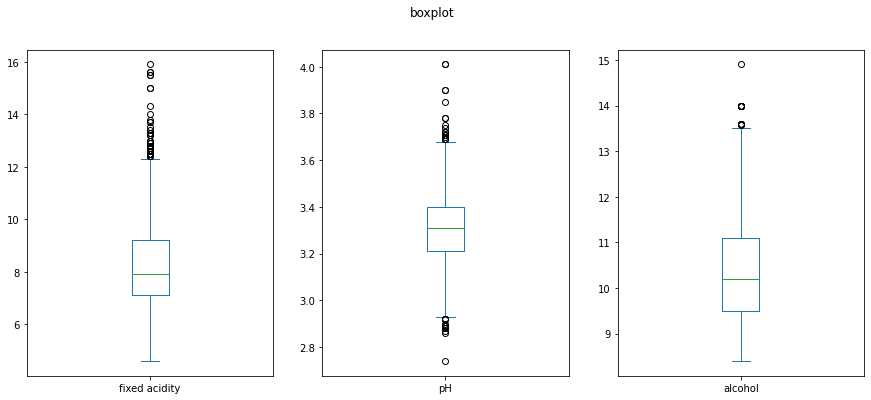

In [6]:
# ds.plot(subplots=True)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
ax1 = ds['fixed acidity'].plot.box(ax=axes[0])
ax2 = ds['pH'].plot.box(ax=axes[1])
ax3 = ds['alcohol'].plot.box(ax=axes[2])
fig.suptitle("boxplot")

<span style="color:red">$\texttt{
on remarque la presence des donnees abberrantes representes par des points isoles nomme les outliers, se trouvant hors des boites a moustaches.
}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comment appelle-t-on ce genre de graphique ? 

<span style="color:red">$\texttt{
C'est le grapghe de boites a moustache?? (en anglais boxplot)
}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

A partir de ces graphiques et sans considérer les données aberrantes, que pouvez-vous déduire quand à la moyenne de chacune des variables ?

<span style="color:red">$\texttt{
ne nous pouvons pas deduire la moyenne car on sait pas qualifier la contribution des points de meme valeurs\\
cepondant, Nous pouvant supposer que tout les points ont la meme probabilite, cela nous permit de faire une approximation que le moyenne simple de fixed acidity, pH, et alcohol \\ 
sont respectivement eviron 8, 3.3 et 10.1 .
}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Que pouvez-vous dire en comparant ces graphiques ?

<span style="color:red">$\texttt{
la barre centrale est tiree legeremnet pour 3), et fortement pour 1) vers le bas malgre que les outliers sont situe en haut, en comparaison avec le 2) ou les points abberantes sont quasi centrés, et la barres centrale est au centre de la boite.
}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Tracez maintenant l'histogramme et la fonction de répartition (*cumulative distribution function* (CDF), en anglais) pour chaque variable. (6 figures attendues, avec titre et/ou noms d'axes)

<AxesSubplot:xlabel='alcohol'>

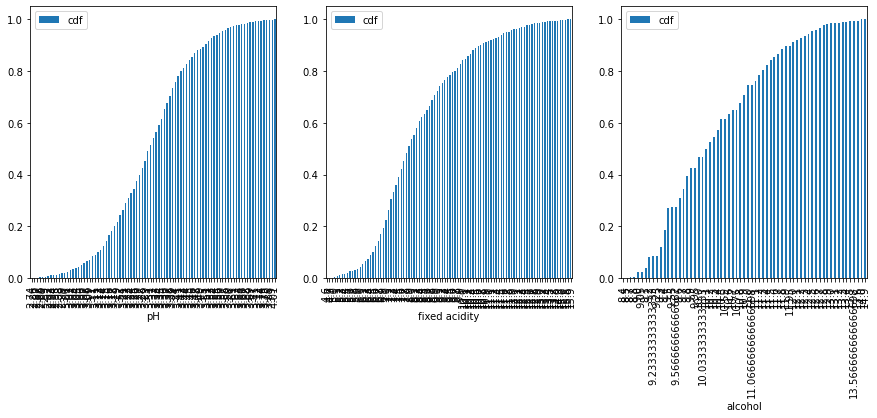

In [46]:
# génération des différentes figures
# fig = plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# ax1 = ds['fixed acidity'].plot.hist(ax=axes[0], bins=50, legend=True)
# ax2 = ds['pH'].plot.hist(ax=axes[1], bins=50, legend=True)
# ax3 = ds['alcohol'].plot.hist(ax=axes[2], bins=50, legend=True)
# fig.suptitle("L'histogramme")
# fig = plt.figure()
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# axis0 = ds.sort_values(by=var).drop_duplicates()
# Freq_var = ['ffa', 'fpH', 'fz']
# axis0['frequence'] = ds.value_counts()
# # axis0[Freq_var] = axis0[var].count()

# axis0.plt()
# Frequency
stats_df = tuple()
stats_df0 = ds.groupby('pH') \
['pH'] \
.agg('count').pipe(pd.DataFrame).rename(columns = {'pH': 'frequency'})

stats_df1 = ds.groupby('fixed acidity') \
['fixed acidity'] \
.agg('count').pipe(pd.DataFrame).rename(columns = {'fixed acidity': 'frequency'})

stats_df2 = ds.groupby('alcohol') \
['alcohol'] \
.agg('count').pipe(pd.DataFrame).rename(columns = {'alcohol': 'frequency'})

# PDF
stats_df0['pdf'] = stats_df0['frequency'] / stats_df0['frequency'].sum()
stats_df1['pdf'] = stats_df1['frequency'] / stats_df1['frequency'].sum()
stats_df2['pdf'] = stats_df2['frequency'] / stats_df2['frequency'].sum()

# CDF
stats_df0['cdf'] = stats_df0['pdf'].cumsum()
stats_df0 = stats_df0.reset_index()
stats_df1['cdf'] = stats_df1['pdf'].cumsum()
stats_df1 = stats_df1.reset_index()
stats_df2['cdf'] = stats_df2['pdf'].cumsum()
stats_df2 = stats_df2.reset_index()


# ax1 = ds['fixed acidity'].to_a().
# ax1.plot.hist(ax=axes[0], bins=50, legend=True)
# ax2 = ds['pH'].plot.hist(ax=axes[1], bins=50, legend=True)
# ax3 = ds['alcohol'].plot.hist(ax=axes[2], bins=50, legend=True)
# fig.suptitle("boxplot")

stats_df0.plot.bar(ax=axes[0], x = 'pH', y =  'cdf', grid = False)
stats_df1.plot.bar(ax=axes[1], x = 'fixed acidity', y =  'cdf', grid = False)
stats_df2.plot.bar(ax=axes[2], x = 'alcohol', y =  'cdf', grid = False)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comparez. En particulier : 
- Les histogrammes générés peuvent être utilisés afin d'avoir une idée de la fonction de densité (*probability density function* (PDF), en anglais) des différentes variables dans la population : les différentes distributions que vous approximez vous font-elles penser à des distributions connues ? 
- Mettez également en relation la PDF et la CDF pour chaque variable (justifiez théoriquement). 
- Mettez vos résultats en relation avec les graphes illustrant les valeurs aberrantes générés plus tôt dans le devoir, pour chaque variable.

<span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.3.
Enfin, vous allez analyser les relations qui existent entre les différentes variables. Comparez, numériquement *et* graphiquement, les trois couples de variables.
- Pour la comparaison numérique, organisez vos valeurs dans une dataframe `rel_df` (matrice de corrélation). 
- Pour les graphiques, organisez vos nuages de points sous la forme d'une "matrice" (comme proposé dans cette [vidéo](https://www.youtube.com/watch?v=6lm4wJ1qm0w) de Jean-luc Doumont).

In [71]:
# comparaison numérique 
rel_df = ds.corr()
# visualisation
rel_df

,fixed acidity,pH,alcohol
fixed acidity,1.000000,-0.682978,-0.061668
pH,-0.682978,1.000000,0.205633
alcohol,-0.061668,0.205633,1.000000


<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

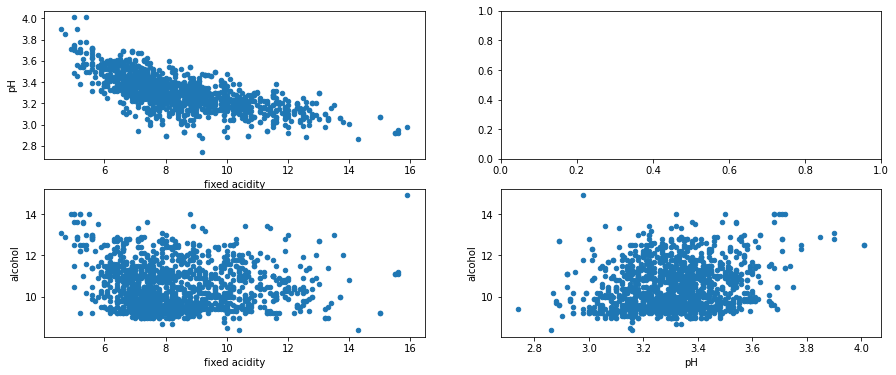

In [70]:
# comparaison graphique
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
# ax1 = ds['fixed acidity'].plot.box(ax=axes[0])
# ax2 = ds['pH'].plot.box(ax=axes[1])
# ax3 = ds['alcohol'].plot.box(ax=axes[2])
# fig.suptitle("boxplot")
ds.plot.scatter(x="fixed acidity", y="pH", ax=axes[0][0])
plt.plot(ax=axes[0][1])
# ds.plot.scatter(x="alcohol", y="fixed acidity", ax=axes[1][1])
ds.plot.scatter(x="pH", y="alcohol", ax=axes[1][1])
ds.plot.scatter(x="fixed acidity", y="alcohol", ax=axes[1][0])

A la lumière des comparaisons numériques **et** graphiques que vous avez générées, que pouvez-vous déduire des relations entre les variables ?  

<span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span>

<!-- END QUESTION -->

## 2. Echantillon, modèle et vraisemblance

Pour cette seconde partie du devoir, vous allez vous focaliser sur une seule variable de votre population: l'alcool (*alcohol* dans votre set de données), dénotée $X$. Afin d'étudier les concepts de modèle et de vraisemblance, vous allez maintenant travailler avec des échantillons et non plus la population complète. Les notions d'estimateur et de biais vont également être abordées.

<!-- BEGIN QUESTION -->

### Question 2.1.
Afin d'étudier le concept de biais et d'estimer le biais de certains estimateurs vus au cours, vous allez premièrement comparer les effets de certains paramètres sur la précision de deux estimateurs : 
- la moyenne d'échantillon $\bar{X}$, comme estimateur de la moyenne de population $\mu$, et
- la variance d'échantillon (biaisée) $\hat{\sigma}^2$, comme estimateur de la variance de population $\sigma^2$.

Pour ce faire, vous allez générer les courbes suivantes, en tirant $500$ échantillons différents :
- dans une première figure, l'évolution de la valeur absolue du biais de la moyenne d'échantillon, ainsi que l'évolution de la variance de la moyenne d'échantillon en fonction de la taille d'échantillon $n$, pour $n \in \{1, 2, \ldots, 100\}$ ;
- dans une seconde figure, idem, mais pour l'évolution de la valeur absolue du biais de la variance d'échantillon.

Au total, **deux** figures sont attendues, chacune contenant **deux** courbes. Pensez à **ajouter une légende** sur vos deux figures, afin d'éviter une confusion entre les courbes (en plus des labels d'axes, évidemment).

*Remarque importante*: lorsque vous calculez des statistiques en utilisant une fonction implémentée dans une librairie Python (ou autre), *vérifiez* dans la documentation que cette fonction calcule bien la statistique souhaitée telle que définie dans le cours théorique.

In [ ]:
...

Qu'observez-vous ? En particulier :

- Comparez, pour chaque estimateur, l'influence de la taille d'échantillon $n$ sur le biais de cet estimateur. 
- Comparez, pour chaque estimateur, l'influence de la taille d'échantillon $n$ sur la variance de cet estimateur. 

Justifiez vos observations.

<span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.2. 
L'estimateur de la variance de la population que vous avez utilisé au point précédent est un estimateur *biaisé*. Répétez maintenant l'opération de la question précédente pour la variance de la population en modifiant votre estimateur pour qu'il soit *non-biaisé*.

Commencez par définir l'estimateur utilisé (nom et définition mathématique).

<span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span>

Tracez maintenant les graphes demandés.

In [ ]:
...

<!-- END QUESTION -->

### Question 2.3.
Vous allez maintenant étudier les concepts de modèle statistique et de vraisemblance. La distribution à modéliser est celle de la variable aléatoire étudiée précédemment dans cette seconde partie du devoir (l'alcool). D'autres variables comme celles étudiées dans la première partie pourraient être modélisées également.

Considérons 2 modèles afin de modéliser la distribution de la variable étudiée :

- une distribution exponentielle de paramètre $\lambda$ dont la densité de probabilité (*probability density function* ou PDF, en anglais) est donnée par (cas 1)
$$\lambda e^{-\lambda x}, \; \text{pour} \; x>0 ;$$

- une distribution normale de paramètres $\mu$ et $\sigma^2$ (dénotant la moyenne et la variance, respectivement) dont la PDF est donnée par (cas 2)
$$\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).$$

<!-- BEGIN QUESTION -->

Par souci de simplicité, vous allez étudier la log-vraisemblance pour les deux modèles présentés ci-avant. Pour chacun de ces modèles, donnez la formulation analytique de la fonction de log-vraisemblance *pour un échantillon $\textbf{x}=\{x_1, x_{2}\}$ de 2 réalisations* de la variable aléatoire $X$ définie plus tôt.

- cas 1 : $\log L(\lambda ; \textbf{x}) = \log f_{X}(\textbf{x} ; \lambda) =$ <span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span> 

- cas 2 : $\log L(\mu, \sigma^2 ; \textbf{x}) = \log f_{X}(\textbf{x} ; \mu, \sigma^2) =$ <span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span> 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

A nouveau, tirez un échantillon i.i.d. de $n=2$ éléments de votre population.

In [ ]:
...

<!-- END QUESTION -->

Tracez maintenant les graphes de la fonction de (log-)vraisemblance pour les deux modèles définis ci-dessus, en fonction de leur(s) paramètre(s) et pour les observations de l'échantillon tiré i.i.d. dans la cellule précédente. Par de souci de simplicité et pour obtenir des figures lisibles, préférez des valeurs de paramètres ($\lambda$, $\mu$ et $\sigma^2$) proches des estimateurs obtenus par la méthode du maximum de vraisemblance. 

<!-- BEGIN QUESTION -->

- distribution exponentielle (un axe des abscisses, un axe des ordonnées) :

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

- distribution normale (deux axes des abscisses, un axe des ordonnées) :

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Que pouvez-vous en déduire quant à la vraisemblance des modèles proposés pour l'échantillon tiré ?

<span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span>

<!-- END QUESTION -->

